# Image Generation

In [127]:
%matplotlib inline
import importlib
from scipy.optimize import fmin_l_bfgs_b
from scipy import misc
from scipy.misc import imsave
from keras import metrics
import numpy as np
from PIL import Image

In [50]:
%pwd

'C:\\Users\\zhang\\Documents\\fast.ai\\fastai_course\\neilz\\part2'

In [79]:
root = 'C:\\Users\\zhang\\Documents\\fast.ai\\fastai_course\\neilz\\part2'
dpath = root + '\\data\\imagenet-sample-train\\train'
#root = 'C:/Users/zhang/Documents/fast.ai/fastai_course/neilz/part2'
#dpath = root + '/data/imagenet-sample-train/train'
dpath

'C:\\Users\\zhang\\Documents\\fast.ai\\fastai_course\\neilz\\part2\\data\\imagenet-sample-train\\train'

In [84]:
!ls C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\data\imagenet-sample-train\

train


In [85]:
%ls C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\data\imagenet-sample-train\

 Volume in drive C is Windows
 Volume Serial Number is DA07-7300

 Directory of C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\data\imagenet-sample-train

03/19/2018  10:13 PM    <DIR>          .
03/19/2018  10:13 PM    <DIR>          ..
01/19/2017  10:33 AM    <DIR>          train
               0 File(s)              0 bytes
               3 Dir(s)  83,200,315,392 bytes free


In [82]:
print(dpath)

C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\data\imagenet-sample-train\train


In [100]:
#Check if a directory or file exists
import os
print(os.path.isdir(dpath+'\\n01443537\\'))
print(os.path.exists(dpath+'\\n01443537\\n01443537_1087.jpeg'))

True
True


In [102]:
import glob
path = dpath + '\\**\\*.jpeg'
print(path)
filenames = glob.glob(path, recursive=True)
len(filenames)

C:\Users\zhang\Documents\fast.ai\fastai_course\neilz\part2\data\imagenet-sample-train\train\**\*.jpeg


19439

In [103]:
filenames[0:5]

['C:\\Users\\zhang\\Documents\\fast.ai\\fastai_course\\neilz\\part2\\data\\imagenet-sample-train\\train\\n01440764\\n01440764_10365.JPEG',
 'C:\\Users\\zhang\\Documents\\fast.ai\\fastai_course\\neilz\\part2\\data\\imagenet-sample-train\\train\\n01440764\\n01440764_11155.JPEG',
 'C:\\Users\\zhang\\Documents\\fast.ai\\fastai_course\\neilz\\part2\\data\\imagenet-sample-train\\train\\n01440764\\n01440764_11787.JPEG',
 'C:\\Users\\zhang\\Documents\\fast.ai\\fastai_course\\neilz\\part2\\data\\imagenet-sample-train\\train\\n01440764\\n01440764_12241.JPEG',
 'C:\\Users\\zhang\\Documents\\fast.ai\\fastai_course\\neilz\\part2\\data\\imagenet-sample-train\\train\\n01440764\\n01440764_12732.JPEG']

(500, 375)


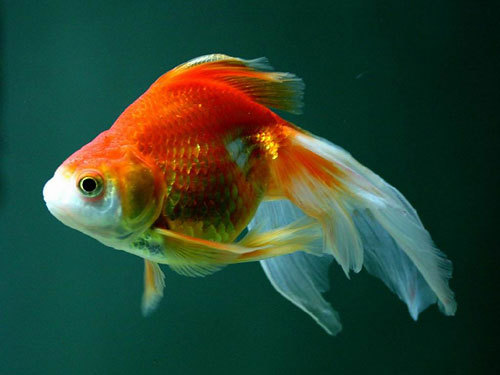

In [125]:
fn = filenames[50]
img = Image.open(fn); 
print(img.size)
img
#sample.show()

In [151]:
np.array(img).shape

(375, 500, 3)

In [144]:
import imageio
pic = imageio.imread(fn)
print(type(pic))
print(pic.shape)
print(pic.dtype)
print(pic[:,:,0])
np.min(pic[:,:,0]), np.max(pic[:,:,0])

<class 'imageio.core.util.Image'>
(375, 500, 3)
uint8
[[ 4  6  8 ...  0  0  0]
 [ 5  6  7 ...  0  0  0]
 [ 6  6  5 ...  1  1  1]
 ...
 [11 11 10 ...  1  1  1]
 [13 13 12 ...  1  1  1]
 [13 13 13 ...  1  1  1]]


(0, 255)

In [149]:
m = np.arange(24).reshape(2,4,3)
a = np.array([1,2,3])
print(m)
print(a)
print(m.shape, a.shape)
m-a

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]
  [ 9 10 11]]

 [[12 13 14]
  [15 16 17]
  [18 19 20]
  [21 22 23]]]
[1 2 3]
(2, 4, 3) (3,)


array([[[-1, -1, -1],
        [ 2,  2,  2],
        [ 5,  5,  5],
        [ 8,  8,  8]],

       [[11, 11, 11],
        [14, 14, 14],
        [17, 17, 17],
        [20, 20, 20]]])

In [153]:
a = np.array([1,2,3,5,7])
np.clip(a, 2,5)

array([2, 2, 3, 5, 5])

In [165]:
a = np.arange(5)
print(a.shape)
print(np.expand_dims(a,0).shape)
print(np.expand_dims(a,1).shape)
np.expand_dims(a,0)

(5,)
(1, 5)
(5, 1)


array([[0, 1, 2, 3, 4]])

In [152]:
rn_mean = np.array([123.68, 116.779, 103.939], dtype=np.float32)
def preproc(img):
    return (img - rn_mean)[:, :, ::-1]

def postproc(img):
    return np.clip(img[:, :, ::-1] + rn_mean, 0, 255)

In [167]:
from vgg16_avg import VGG16_Avg

In [168]:
model = VGG16_Avg(include_top=False)

TypeError: _obtain_input_shape() got an unexpected keyword argument 'dim_ordering'